# Data as a table
A basic table is 2D grid of data, rows represtnt individual elements of the dataset and the columns represent quantities related to each of these elements.

In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers = n_samples.
<br>
Each column of the data refers to a particular quantitative piece of information that describes each sample. In general we refer it as n_features<br><br>

Here in this dataset the species would be considered as a target array or variable

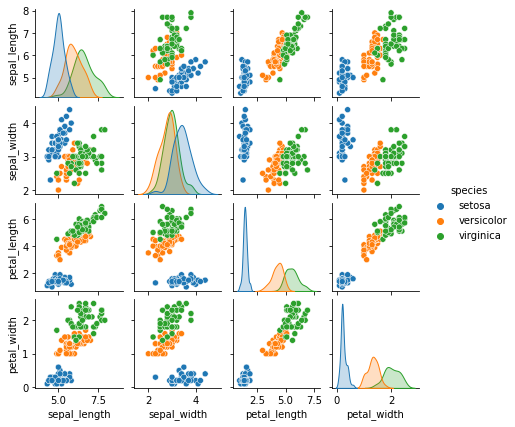

In [4]:
%matplotlib inline
sns.pairplot(iris, hue='species', height=1.5);

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

## Supervised Learning Example: Simple Linear Regression

It is a common case of fitting a line to (x, y) data. We will use the following simple data for regression example

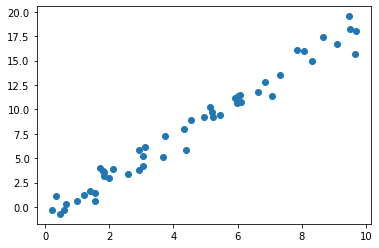

In [7]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10*rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y)

In [9]:
from sklearn.linear_model import LinearRegression

### Choosing Hyperparameters
An important point is that a class of model is not the same as an instance of a model.<br>
We have to select the hyperparameters which we will pass to the instance of the model, like:<br>
1) Would we like to fit for the offset (that is y-intercept)?<br>
2) Would we like the model to be normalized?<br>
3) Would we like to preprocess our features to add model flexibility?<br>
4) What degree of regularization would we like to use in out model?<br>
5) How many model components would we like to use?<br>

<br>
These are the examples of some important choices that must be made once the model class is selected. These choices are ofter represented as hyperparameters or parameters that must be set before the model is fit to the data. In Scikit-learn, hyperparameters are choses by passing values at model instantiation.<br>
For our linear regression example, we can instantiate the LinearRegression class and specify that we would like to fit the intercept using fit_intercept hyperparameter.

In [10]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [11]:
# Arrange the data into features matrix and target vector
X = x[:, np.newaxis]
X.shape

(50, 1)

In [12]:
# Fit the model to your data
model.fit(X, y)

LinearRegression()

This fit() command causes a number of model-dependent internal computations to take place and the results of these computations are stored in model-specific attributes that the user can explore.

In [13]:
model.coef_ #slope of the simple linear fit to the data

array([1.9776566])

In [14]:
model.intercept_ #intercept of the simple linear fit to the data

-0.9033107255311146

### Predict the labels for unknown data
After trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. Using predict()

In [16]:
xfit = np.linspace(-1, 12)
Xfit = xfit[:, np.newaxis] # getting features matrix 2D [n_samples, n_features]

In [18]:
#predicting
yfit = model.predict(Xfit)

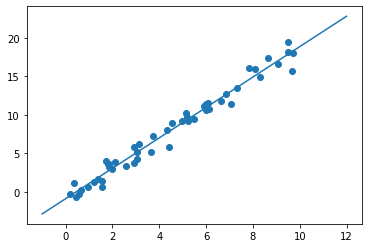

In [22]:
plt.scatter(x,y)
plt.plot(xfit, yfit)

## Supervised Learning Example: Iris classification
Q) Given a model trained on a portion of iris data, how well can we predict the remaining labels?
<br>
For this we will use the extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution. Because it is fast and no hyperparameters to choose, it is a good model for baseline classification. We will use train_test_split utility function

In [24]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1)



In [28]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
ymodel = model.predict(Xtest)

We can use the accuracy_Score utility to see the fraction of the predicted labels that match their true value

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ymodel)

0.9736842105263158

## Unsupervised learning example: Iris dimensionality
As an example of unsupervised learnging problem, lets take a look at the reducing the dimensionality of Iris data so to more easily visualize it. Iris dataset is 4D, there are 4 feeatures recorded for each sample.<br>
The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualize data, as it is much easier to plot 2D data as compared to 3D or more.<br><br>
Here we will use <b>Principal Compoment  analysis (PCA)</b> which is a <b>fast linear dimensionality reduction technique</b>. <u>We will ask the model to return 2 components that is 2 D representation of the data.</u>

In [30]:
from sklearn.decomposition import PCA
model = PCA(n_components = 2)
model.fit(X_iris)
X_2D = model.transform(X_iris) #Transform the data to 2 dimensions

Now let's plot the results. A quick way to do this is to insert the results into the original Iris DataFrame, and use Seaborn's lmplot to show the results:

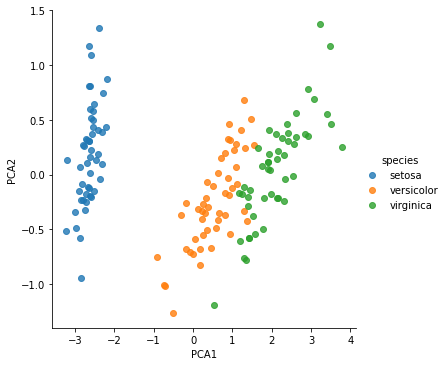

In [42]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x = "PCA1", y="PCA2", hue='species', data = iris, fit_reg = False)

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels! This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

## Unsupervised Learning: Iris Clustering
Applying clustering to iris data. A clustering algorithm attempts to find distinct groups of data without reference to any labels. Heere we will use a powerful clustering method called gaussian mixture model (GMM), it attempts to model the data as a collection of Gaussian blobs. It is imported using <b>sklearn.mixture import GaussianMixture</b>

In [38]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris) # We are using the original dataset not from the train_test_split, and also there is no y in the trainig of unsupervised model.
y_gmm = model.predict(X_iris)


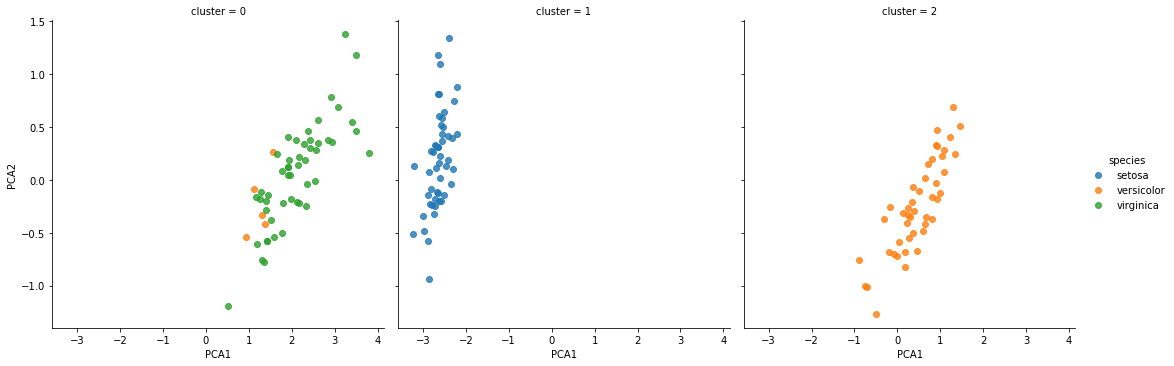

In [40]:
# add it to the iris dataset and use seaborn to create plot
iris['cluster'] = y_gmm
sns.lmplot(x = "PCA1", y = "PCA2", data = iris, hue = 'species', col='cluster', fit_reg=False)

In [43]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1


By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the setosa species is separated perfectly within cluster 0, while there remains a small amount of mixing between versicolor and virginica. This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could automatically identify the presence of these different groups of species with a simple clustering algorithm! This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing.

# Application: Exploring hand-Written digits

An optical character recognition problem: The identification of hand-written digits. In the wild, this problem involves both location and identifying characters in an image. Here we'll take a shortcut and use Scikit-learn's pre formatted digits
<br><br>
## Loading and Visualizing the digits data

In [44]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [47]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels. Let's visualize the first hundred of these:

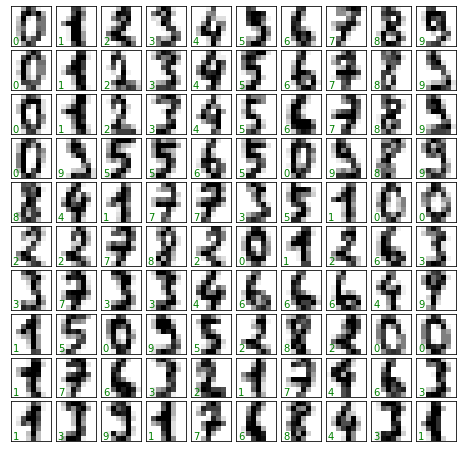

In [48]:
fig, axes = plt.subplots(10, 10, figsize=(8,8),
                        subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw = dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

In order to work with this data within Scikit learn we need a 2D [n_samples, n_features] representation. We can accomplish this by treating each pixel in the image as a feature, that is by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit. Additionally we need a target array, which gives us the previously determined label for each dight. These 2 quantities are build into the digits dataset under the data and target attributes, respectively.

In [54]:
X = digits.data
X.shape
#We see here that there are 1,797 samples and 64 features.

(1797, 64)

In [55]:
y = digits.target
y.shape

(1797,)

## Unsupervised Learning: Dimensionality Reduction
We'd like to visualize our points within a 64 dimention paramater space. but it is difficult to  effectively do that.  Instead we will reduce the dimensions to two using an unsupervised method. Sure we will make use of a manifold learning algorithm called Isomap and transform the data to 2D.

In [56]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

We see that the projected data is now two-dimensional. Let's plot this data to see if we can learn anything from its structure:

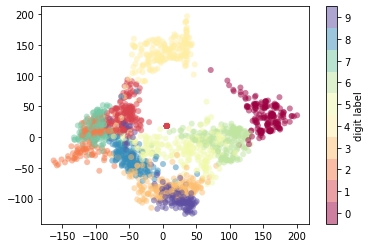

In [62]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

## Classification on Digits
Let's apply classification algorithm to the digits. As with Iris data previously, we will split the data into a trsining and testing set and fit a Gaussian naive Bayes model

In [63]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [64]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [65]:
# check accuracy
accuracy_score(ytest, y_model)

0.8333333333333334

With even this extremely simple model, we find about 80% accuracy for classification of the digits! However, this single number doesn't tell us where we've gone wrong—one nice way to do this is to use the confusion matrix, which we can compute with Scikit-Learn and plot with Seaborn:

Text(91.68, 0.5, 'True value')

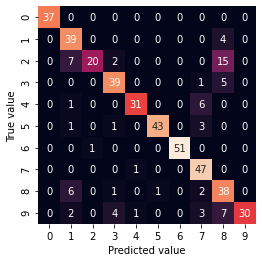

In [66]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar = False)
plt.xlabel('Predicted value')
plt.ylabel('True value')

In [67]:
mat

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  7, 20,  2,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  5,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  1,  0,  1,  0, 43,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  6,  0,  1,  0,  1,  0,  2, 38,  0],
       [ 0,  2,  0,  4,  1,  0,  0,  3,  7, 30]])

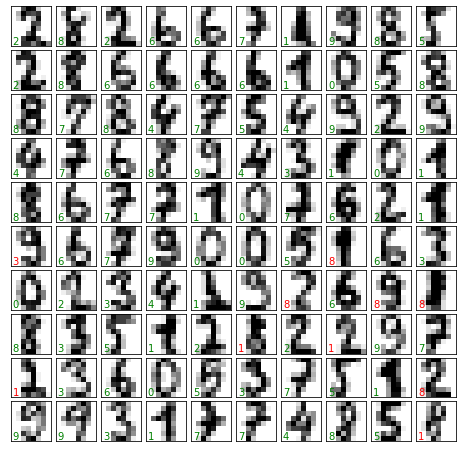

In [68]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Examining this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally. To go beyond our 80% classification rate, we might move to a more sophisticated algorithm such as support vector machines (see In-Depth: Support Vector Machines), random forests (see In-Depth: Decision Trees and Random Forests) or another classification approach.